In [ ]:
import yfinance as yf
import pandas as pd

# Date range: Aug 11, 2022 to Aug 11, 2025
start_date = "2022-08-11"
end_date = "2025-08-11"

# Exchange rates
fx_tickers = ["CNHINR=X", "USDINR=X", "USDCNY=X"]
fx_data = yf.download(fx_tickers, start=start_date, end=end_date)['Close']
fx_data.columns = ['INR/CNY', 'INR/USD', 'CNY/USD']

# Brent Oil and Copper
commodities = ["BZ=F", "HG=F"]  # Brent Oil, Comex Copper
commodity_data = yf.download(commodities, start=start_date, end=end_date)['Close']
commodity_data.columns = ['Brent_Oil', 'Comex_Copper']

# Merge all datasets
merged_data = pd.concat([fx_data, commodity_data], axis=1)

# Display recent data
print("Final merged dataset:")
print(merged_data.tail())
print(f"Data Range: {merged_data.index[0].date()} to {merged_data.index[-1].date()}")

# Save merged data
merged_data.to_excel('merged_fx_commodities_2022_2025.xlsx')
merged_data.to_csv('merged_fx_commodities_2022_2025.csv')
print("Merged data saved to merged_fx_commodities_2022_2025.xlsx and .csv")


/tmp/ipython-input-537467723.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = yf.download(fx_tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CNHINR=X']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-08-11 -> 2025-08-11)')
/tmp/ipython-input-537467723.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  commodity_data = yf.download(commodities, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Final merged dataset:
            INR/CNY  INR/USD    CNY/USD  Brent_Oil  Comex_Copper
Date                                                            
2025-08-04      NaN   7.2116  87.245300  68.760002        4.4150
2025-08-05      NaN   7.1780  87.893303  67.639999        4.3640
2025-08-06      NaN   7.1834  87.723099  66.889999        4.3910
2025-08-07      NaN   7.1828  87.762497  66.430000        4.3785
2025-08-08      NaN   7.1810  87.433197  66.589996        4.4555
Data Range: 2022-08-11 to 2025-08-08
Merged data saved to merged_fx_commodities_2022_2025.xlsx and .csv


In [ ]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Date range: Aug 11, 2022 to Aug 11, 2025
start_date = "2022-08-11"
end_date = "2025-08-11"

# Exchange rates (fixed tickers)
fx_tickers = ["USDINR=X", "USDCNY=X"]  # Removed problematic CNHINR=X
fx_data = yf.download(fx_tickers, start=start_date, end=end_date)['Close']
fx_data.columns = ['USD/INR', 'USD/CNY']

# Calculate INR/CNY from existing data
fx_data['INR/CNY'] = fx_data['USD/CNY'] / fx_data['USD/INR']

# Brent Oil and Copper
commodities = ["BZ=F", "HG=F"]
commodity_data = yf.download(commodities, start=start_date, end=end_date)['Close']
commodity_data.columns = ['Brent_Oil', 'Comex_Copper']

# Merge daily data
daily_merged = pd.concat([fx_data, commodity_data], axis=1)


# Display results
print("Daily data shape:", daily_merged.shape)
print(f"Monthly data range: {daily_merged.index[0].date()} to {daily_merged.index[-1].date()}")

print("\ndaily dataset (last 5 days):")
print(daily_merged.tail())

# Save monthly data for VECM
daily_merged.to_excel('daily_data_2022_2025.xlsx')
daily_merged.to_csv('daily_vecm_data_2022_2025.csv')
print("\ndaily data saved for  analysis")

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


Daily data shape: (780, 5)
Monthly data range: 2022-08-11 to 2025-08-08

daily dataset (last 5 days):
            USD/INR    USD/CNY    INR/CNY  Brent_Oil  Comex_Copper
Date                                                              
2025-08-04   7.2116  87.245300  12.097912  68.760002        4.4150
2025-08-05   7.1780  87.893303  12.244818  67.639999        4.3640
2025-08-06   7.1834  87.723099  12.211919  66.889999        4.3910
2025-08-07   7.1828  87.762497  12.218424  66.430000        4.3785
2025-08-08   7.1810  87.433197  12.175629  66.589996        4.4555

daily data saved for  analysis


In [ ]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Try different INR/CNY tickers
tickers_to_try = ["INRCNY=X", "CNYINR=X", "INR=X", "CNY=X"]

start_date = "2022-08-11"
end_date = "2025-08-11"

# Try each ticker
for ticker in tickers_to_try:
    data = yf.download(ticker, start=start_date, end=end_date)
    if not data.empty:
        daily_inr_cny = data['Close']
        print(f"Success with {ticker}")
        print(f"daily data points: {len(daily_inr_cny)}")
        print(daily_inr_cny.tail())
        daily_inr_cny.to_csv(f'inr_cny_daily_{ticker.replace("=", "")}.csv')
        break
else:
    print("All tickers failed. Using USD cross-calculation:")
    usd_inr = yf.download("USDINR=X", start=start_date, end=end_date)['Close']
    usd_cny = yf.download("USDCNY=X", start=start_date, end=end_date)['Close']
    inr_cny = usd_cny / usd_inr
    monthly_inr_cny = inr_cny.resample('ME').last()
    print(monthly_inr_cny.tail())

[*********************100%***********************]  1 of 1 completed

Success with INRCNY=X
daily data points: 779
Ticker      INRCNY=X
Date                
2025-08-04  0.082659
2025-08-05  0.081667
2025-08-06  0.081887
2025-08-07  0.081843
2025-08-08  0.082131


In [ ]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Date range: Aug 11, 2022 to Aug 11, 2025
start_date = "2022-08-11"
end_date = "2025-08-11"



# DXY data
dxy = yf.download("DX-Y.NYB", start=start_date, end=end_date)['Close']

# Convert to monthly
dxy_monthly = dxy.resample('ME').last()

print("Monthly data shape:", dxy_monthly.shape)
print("Monthly dataset (last 5):")
print(dxy_monthly.tail())

dxy_monthly.to_excel('dxy_2022_2025.xlsx')
dxy_monthly.to_csv('dxy_2022_2025.csv')
print("Monthly data DXY saved")

[*********************100%***********************]  1 of 1 completed


Monthly data shape: (37, 1)
Monthly dataset (last 5):
Ticker        DX-Y.NYB
Date                  
2025-04-30   99.470001
2025-05-31   99.330002
2025-06-30   96.879997
2025-07-31  100.029999
2025-08-31   98.180000
Monthly data DXY saved


# New section

In [ ]:
import numpy as np
import pandas as pd

# Simple MIDAS aggregation (no optimization)
def midas_weights(K, theta1=2, theta2=1):
    """Fixed Beta weights for demo"""
    k = np.arange(1, K+1)
    weights = k**(theta1-1) * (K-k+1)**(theta2-1)
    return weights / weights.sum()

# Create sample data
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')

# Daily data (365 points) - e.g., FX rates
daily_fx = pd.Series(100 + np.cumsum(np.random.normal(0, 0.5, len(dates_daily))),
                    index=dates_daily)

# Monthly data (12 points) - e.g., CPI
monthly_cpi = pd.Series(2 + np.random.normal(0, 0.2, len(dates_monthly)),
                       index=dates_monthly)

print("Data created:")
print(f"Daily FX: {len(daily_fx)} observations")
print(f"Monthly CPI: {len(monthly_cpi)} observations")

# MIDAS aggregation: Daily → Monthly
def daily_to_monthly_midas(daily_series, K=22):
    """Convert daily to monthly using MIDAS weights"""
    weights = midas_weights(K)
    monthly_result = []
    monthly_dates = []

    for i in range(K, len(daily_series), K):
        # Get last K daily observations
        daily_window = daily_series.iloc[i-K:i]
        # Apply MIDAS weights (recent gets more weight)
        midas_value = np.sum(daily_window.values * weights)
        monthly_result.append(midas_value)
        monthly_dates.append(daily_series.index[i-1])

    return pd.Series(monthly_result, index=monthly_dates)

# MIDAS aggregation: Monthly → Daily
def monthly_to_daily_midas(monthly_series, daily_index):
    """Convert monthly to daily using forward fill"""
    daily_result = pd.Series(index=daily_index, dtype=float)

    for i, (month_end, month_val) in enumerate(monthly_series.items()):
        # Find start of month
        if i == 0:
            month_start = daily_index[0]
        else:
            prev_month_end = monthly_series.index[i-1]
            month_start = prev_month_end + pd.Timedelta(days=1)

        # Get daily dates in this month
        month_days = daily_index[(daily_index >= month_start) & (daily_index <= month_end)]

        # Fill all days in this month with monthly value
        daily_result[month_days] = month_val

    return daily_result.fillna(method='ffill')

# Apply MIDAS transformations
fx_monthly_midas = daily_to_monthly_midas(daily_fx, K=22)
cpi_daily_midas = monthly_to_daily_midas(monthly_cpi, daily_fx.index)

print(f"\nMIDAS Results:")
print(f"FX aggregated to monthly: {len(fx_monthly_midas)} observations")
print(f"CPI expanded to daily: {len(cpi_daily_midas)} observations")

# Show sample results
print(f"\nSample MIDAS weights (22 days):")
weights = midas_weights(22)
print(f"Recent days get higher weights: {weights[-3:]}")
print(f"Older days get lower weights: {weights[:3]}")

print(f"\nOriginal daily FX (last 5 days): ")
print(daily_fx.tail())

print(f"\nMIDAS monthly FX (last 3 months):")
print(fx_monthly_midas.tail(3))

print(f"\nOriginal monthly CPI:")
print(monthly_cpi.head(3))

print(f"\nMIDAS daily CPI (first 10 days):")
print(cpi_daily_midas.head(10))

Data created:
Daily FX: 365 observations
Monthly CPI: 12 observations

MIDAS Results:
FX aggregated to monthly: 16 observations
CPI expanded to daily: 365 observations

Sample MIDAS weights (22 days):
Recent days get higher weights: [0.07905138 0.08300395 0.08695652]
Older days get lower weights: [0.00395257 0.00790514 0.01185771]

Original daily FX (last 5 days): 
2023-12-27    108.293843
2023-12-28    108.722029
2023-12-29    109.562807
2023-12-30    109.298257
2023-12-31    109.214450
Freq: D, dtype: float64

MIDAS monthly FX (last 3 months):
2023-11-04    103.784029
2023-11-26    105.854840
2023-12-18    109.000488
dtype: float64

Original monthly CPI:
2023-01-31    2.271393
2023-02-28    2.268767
2023-03-31    2.354807
Freq: ME, dtype: float64

MIDAS daily CPI (first 10 days):
2023-01-01    2.271393
2023-01-02    2.271393
2023-01-03    2.271393
2023-01-04    2.271393
2023-01-05    2.271393
2023-01-06    2.271393
2023-01-07    2.271393
2023-01-08    2.271393
2023-01-09    2.271393


/tmp/ipython-input-449294009.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
/tmp/ipython-input-449294009.py:63: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return daily_result.fillna(method='ffill')


In [ ]:
import numpy as np
import pandas as pd

# Short frequency data (weekly)
weekly_data = pd.Series([100, 102, 98, 105, 99, 101, 103, 97, 106, 100, 104, 96])

# Target: Convert to daily (7 days per week)
def short_to_long_midas(short_data, expansion_factor=7):
    """Interpolate short freq to long freq using MIDAS weights"""
    long_data = []

    for i in range(len(short_data)):
        current_val = short_data[i]

        if i < len(short_data) - 1:
            next_val = short_data[i + 1]

            # MIDAS weights: higher weight to current value, declining to next
            #weights = np.exp(-1 * np.arange(expansion_factor))
            #weights = weights / weights.sum()
                        # Beta MIDAS weights (better than exponential)
            k = np.arange(1, expansion_factor + 1)
            theta1, theta2 = -0.4, 2 # Hyperparameters: shape of weight curve
            weights = k**(theta1-1) * (expansion_factor - k + 1)**(theta2-1)
            weights = weights / weights.sum()

            # Interpolate between current and next value
            for j in range(expansion_factor):
                interpolated = current_val * weights[j] + next_val * (1 - weights[j])
                long_data.append(interpolated)
        else:
            # Last period: repeat current value
            long_data.extend([current_val] * expansion_factor)

    return np.array(long_data)

# Convert weekly to daily
daily_interpolated = short_to_long_midas(weekly_data, 7)

print("Weekly data (12 weeks):", weekly_data.tolist())
print(f"Daily data (84 days): {len(daily_interpolated)} points")
print("First week daily values:", daily_interpolated[:7])
print("Second week daily values:", daily_interpolated[7:14])

Weekly data (12 weeks): [100, 102, 98, 105, 99, 101, 103, 97, 106, 100, 104, 96]
Daily data (84 days): 84 points
First week daily values: [100.77894315 101.60340512 101.81265673 101.89981243 101.94502046
 101.97160407 101.98855804]
Second week daily values: [100.4421137   98.79318976  98.37468654  98.20037514  98.10995908
  98.05679186  98.02288393]


In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()

# Load into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['exc.csv']), parse_dates=['Date'], index_col='Date')

# Check head
df.head()


Saving exc.csv to exc.csv


,USD/INR,USD/CNY,CNY/INR(calculated),INRCNY=X,Brent_Oil,Comex_Copper
Date,,,,,,
2025-08-08,7.1810,87.433197,12.175629,0.082131,66.589996,4.4555
2025-08-07,7.1828,87.762497,12.218424,0.081843,66.430000,4.3785
2025-08-06,7.1834,87.723099,12.211919,0.081887,66.889999,4.3910
2025-08-05,7.1780,87.893303,12.244818,0.081667,67.639999,4.3640
2025-08-04,7.2116,87.245300,12.097912,0.082659,68.760002,4.4150


In [ ]:
daily_log   = np.log(df)

# Returns (for volatility/GARCH, not cointegration)
daily_returns = daily_log.diff().dropna()

In [ ]:
daily_returns

,USD/INR,USD/CNY,CNY/INR(calculated),INRCNY=X,Brent_Oil,Comex_Copper
Date,,,,,,
2025-08-07,0.000251,0.003759,0.003509,-0.003513,-0.002406,-0.017433
2025-08-06,0.000084,-0.000449,-0.000533,0.000537,0.006901,0.002851
2025-08-05,-0.000752,0.001938,0.002690,-0.002690,0.011150,-0.006168
2025-08-04,0.004670,-0.007400,-0.012070,0.012074,0.016423,0.011619
2025-08-01,-0.001582,0.002794,0.004376,-0.004377,0.013148,-0.000566
...,...,...,...,...,...,...
2022-08-17,0.001106,-0.002696,-0.003802,0.002376,-0.030911,-0.013390
2022-08-16,-0.002271,0.005128,0.007399,-0.005969,-0.014087,0.010643
2022-08-15,-0.004470,0.000939,0.005408,-0.005709,0.029452,-0.002065


In [ ]:
daily_returns.isna().sum()

,0
USD/INR,0
USD/CNY,0
CNY/INR(calculated),0
INRCNY=X,0
Brent_Oil,0
Comex_Copper,0


In [ ]:
from statsmodels.tsa.stattools import adfuller
###ADF tests
def adf_test(series, name=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test for {name}')
    print(f'  Test Statistic : {result[0]}')
    print(f'  p-value        : {result[1]}')
    print(f'  Critical Values: {result[4]}')
    if result[1] < 0.05:
        print("  ✅ Stationary (reject H0)")
    else:
        print("  ❌ Non-stationary (fail to reject H0)")
    print('\n')

# Daily variables (levels + returns)
for col in daily_log.columns:
    adf_test(daily_log[col], name=col + " (log-level)")
    adf_test(daily_returns[col], name=col + " (returns)")


ADF Test for USD/INR (log-level)
  Test Statistic : -1.7642953222924038
  p-value        : 0.3983265366751367
  Critical Values: {'1%': np.float64(-3.439006442437876), '5%': np.float64(-2.865360521688131), '10%': np.float64(-2.5688044403756587)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for USD/INR (returns)
  Test Statistic : -4.585676171861259
  p-value        : 0.00013725395874951922
  Critical Values: {'1%': np.float64(-3.439006442437876), '5%': np.float64(-2.865360521688131), '10%': np.float64(-2.5688044403756587)}
  ✅ Stationary (reject H0)


ADF Test for USD/CNY (log-level)
  Test Statistic : -1.4793704686280442
  p-value        : 0.5436906750518996
  Critical Values: {'1%': np.float64(-3.4387940607132887), '5%': np.float64(-2.8652669182555943), '10%': np.float64(-2.5687545755297494)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for USD/CNY (returns)
  Test Statistic : -32.22353942676134
  p-value        : 0.0
  Critical Values: {'1%': np.float64(-3.4387940607132887

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 14.1 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(np.log(daily_returns['INRCNY=X']))
print(pp_test.summary())



/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


MissingDataError: exog contains inf or nans

In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()

# Load into DataFrame
import io
mf = pd.read_csv(io.BytesIO(uploaded['rates.csv']), parse_dates=['Date'], index_col='Date')

# Check head
mf.head()

Saving rates.csv to rates.csv


,USD/INR,USD/CNY,INR/CNY(calculated),CNY/INR(Historical),Brent_Oil,Comex_Copper,CPI_IND,INFL_IND,CPI_CHI,INFL_CHI,r_short_INR,r_long_INR,r_short_CNY,r_longCNY,fx_CNY(MillUSD),fx_INR(MillUSD)
Date,,,,,,,,,,,,,,,,
2025-07-31,7.1764,87.714600,12.222646,0.081856,72.529999,4.3305,195.9915,0.922503,100.5,0.39960,5.50,6.37,1.497,1.7044,3660698,688871
2025-06-30,7.1721,85.455299,11.914962,0.083928,67.610001,5.0300,194.2000,0.621762,100.1,0.20020,5.50,6.33,1.763,1.6469,3660698,702784
2025-05-31,7.2037,85.361298,11.849646,0.084390,63.900002,4.6525,193.0000,0.207684,99.9,0.00000,6.00,6.23,1.617,1.6712,3627081,691485
2025-04-30,7.2690,85.170799,11.716990,0.085346,63.119999,4.5600,192.6000,0.312500,99.9,0.00000,6.00,6.4,1.762,1.6243,3593464,686064
2025-03-31,7.2628,85.538803,11.777662,0.084906,74.739998,5.0200,192.0000,-0.259740,99.9,0.60423,6.25,6.62,2.023,1.8129,3591327,676268


In [ ]:
monthly=mf[['CNY/INR(Historical)','CPI_IND','CPI_CHI','r_short_INR','r_short_CNY','r_long_INR','r_longCNY','fx_CNY(MillUSD)','fx_INR(MillUSD)']]
monthly.head()

,CNY/INR(Historical),CPI_IND,CPI_CHI,r_short_INR,r_short_CNY,r_long_INR,r_longCNY,fx_CNY(MillUSD),fx_INR(MillUSD)
Date,,,,,,,,,
2025-07-31,0.081856,195.9915,100.5,5.50,1.497,6.37,1.7044,3660698,688871
2025-06-30,0.083928,194.2000,100.1,5.50,1.763,6.33,1.6469,3660698,702784
2025-05-31,0.084390,193.0000,99.9,6.00,1.617,6.23,1.6712,3627081,691485
2025-04-30,0.085346,192.6000,99.9,6.00,1.762,6.4,1.6243,3593464,686064
2025-03-31,0.084906,192.0000,99.9,6.25,2.023,6.62,1.8129,3591327,676268


In [ ]:
monthly['log_INR/CNY']=np.log(monthly['CNY/INR(Historical)'])
monthly['log_CPI_IND']=np.log(monthly['CPI_IND'])
monthly['log_CPI_CHI']=np.log(monthly['CPI_CHI'])
monthly['log_fx_IND']=np.log(monthly['fx_INR(MillUSD)'])
monthly['log_fx_CHI']=np.log(monthly['fx_CNY(MillUSD)'])
monthly_log=monthly.drop(['CNY/INR(Historical)','CPI_IND','CPI_CHI','fx_INR(MillUSD)','fx_CNY(MillUSD)'],axis=1)
monthly_log.head()

,r_short_INR,r_short_CNY,r_long_INR,r_longCNY,log_INR/CNY,log_CPI_IND,log_CPI_CHI,log_fx_IND,log_fx_CHI
Date,,,,,,,,,
2025-07-31,5.50,1.497,6.37,1.7044,-2.502794,5.278071,4.610158,13.442809,15.113164
2025-06-30,5.50,1.763,6.33,1.6469,-2.477796,5.268889,4.606170,13.462805,15.113164
2025-05-31,6.00,1.617,6.23,1.6712,-2.472306,5.262690,4.604170,13.446597,15.103939
2025-04-30,6.00,1.762,6.4,1.6243,-2.461042,5.260615,4.604170,13.438726,15.094627
2025-03-31,6.25,2.023,6.62,1.8129,-2.466211,5.257495,4.604170,13.424345,15.094032


In [ ]:
monthly_log1= monthly_log
for i in range(len(monthly_log1)):
  if monthly_log1['r_long_INR'][i]=='..':
     monthly_log1['r_long_INR'][i]= 7.11

# Remove unwanted characters (like commas or % signs), then convert to float
monthly_log1['r_long_INR'] = (
    monthly_log1['r_long_INR']
    .replace({',': '', '%': ''}, regex=True)   # clean text
    .astype(float)                             # convert to float64
)

# Confirm dtype
print(monthly_log1['r_long_INR'].dtype)



float64


/tmp/ipython-input-3337219063.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if monthly_log1['r_long_INR'][i]=='..':
/tmp/ipython-input-3337219063.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origina

In [ ]:
monthly_log1

,r_short_INR,r_short_CNY,r_long_INR,r_longCNY,log_INR/CNY,log_CPI_IND,log_CPI_CHI,log_fx_IND,log_fx_CHI
Date,,,,,,,,,
2025-07-31,5.50,1.497,6.37,1.7044,2.502794,5.278071,4.610158,13.442809,15.113164
2025-06-30,5.50,1.763,6.33,1.6469,2.477796,5.268889,4.606170,13.462805,15.113164
2025-05-31,6.00,1.617,6.23,1.6712,2.472306,5.262690,4.604170,13.446597,15.103939
2025-04-30,6.00,1.762,6.40,1.6243,2.461042,5.260615,4.604170,13.438726,15.094627
2025-03-31,6.25,2.023,6.62,1.8129,2.466211,5.257495,4.604170,13.424345,15.094032
2025-02-28,6.25,2.093,6.73,1.7152,2.483807,5.260096,4.598146,13.367187,15.077911
2025-01-31,6.50,1.715,6.71,1.6299,2.490410,5.264761,4.610158,13.354438,15.067861
2024-12-31,6.50,1.966,6.76,1.6752,2.464257,5.275049,4.606170,13.360727,15.061970
2024-11-30,6.50,1.631,6.79,2.0206,2.456378,5.280662,4.607168,13.397098,15.055495


In [ ]:
monthly_log1['spread_INR']=monthly_log1['r_long_INR']-monthly_log1['r_short_INR']
monthly_log1['spread_CNY']=monthly_log1['r_longCNY']-monthly_log1['r_short_CNY']
monthly_log1

,r_short_INR,r_short_CNY,r_long_INR,r_longCNY,log_INR/CNY,log_CPI_IND,log_CPI_CHI,log_fx_IND,log_fx_CHI,spread_INR,spread_CNY
Date,,,,,,,,,,,
2025-07-31,5.50,1.497,6.37,1.7044,2.502794,5.278071,4.610158,13.442809,15.113164,0.87,0.2074
2025-06-30,5.50,1.763,6.33,1.6469,2.477796,5.268889,4.606170,13.462805,15.113164,0.83,-0.1161
2025-05-31,6.00,1.617,6.23,1.6712,2.472306,5.262690,4.604170,13.446597,15.103939,0.23,0.0542
2025-04-30,6.00,1.762,6.40,1.6243,2.461042,5.260615,4.604170,13.438726,15.094627,0.40,-0.1377
2025-03-31,6.25,2.023,6.62,1.8129,2.466211,5.257495,4.604170,13.424345,15.094032,0.37,-0.2101
2025-02-28,6.25,2.093,6.73,1.7152,2.483807,5.260096,4.598146,13.367187,15.077911,0.48,-0.3778
2025-01-31,6.50,1.715,6.71,1.6299,2.490410,5.264761,4.610158,13.354438,15.067861,0.21,-0.0851
2024-12-31,6.50,1.966,6.76,1.6752,2.464257,5.275049,4.606170,13.360727,15.061970,0.26,-0.2908
2024-11-30,6.50,1.631,6.79,2.0206,2.456378,5.280662,4.607168,13.397098,15.055495,0.29,0.3896


In [ ]:
monthly_returns= monthly_log1.diff().dropna()
monthly_returns.head()

,r_short_INR,r_short_CNY,r_long_INR,r_longCNY,log_INR/CNY,log_CPI_IND,log_CPI_CHI,log_fx_IND,log_fx_CHI,spread_INR,spread_CNY
Date,,,,,,,,,,,
2025-06-30,0.00,0.266,-0.04,-0.0575,-0.024998,-0.009183,-0.003988,0.019996,0.000000,-0.04,-0.3235
2025-05-31,0.50,-0.146,-0.10,0.0243,-0.005490,-0.006198,-0.002000,-0.016208,-0.009226,-0.60,0.1703
2025-04-30,0.00,0.145,0.17,-0.0469,-0.011265,-0.002075,0.000000,-0.007871,-0.009312,0.17,-0.1919
2025-03-31,0.25,0.261,0.22,0.1886,0.005169,-0.003120,0.000000,-0.014381,-0.000595,-0.03,-0.0724
2025-02-28,0.00,0.070,0.11,-0.0977,0.017597,0.002601,-0.006024,-0.057158,-0.016122,0.11,-0.1677


In [ ]:
from statsmodels.tsa.stattools import adfuller
###ADF tests
def adf_test(series, name=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test for {name}')
    print(f'  Test Statistic : {result[0]}')
    print(f'  p-value        : {result[1]}')
    print(f'  Critical Values: {result[4]}')
    if result[1] < 0.05:
        print("  ✅ Stationary (reject H0)")
    else:
        print("  ❌ Non-stationary (fail to reject H0)")
    print('\n')

# Daily variables (levels + returns)
for col in monthly_log1.columns:
    adf_test(monthly_log1[col], name=col + " (log-level)")
    adf_test(monthly_returns[col], name=col + " (returns)")


ADF Test for r_short_INR (log-level)
  Test Statistic : 1.2221806066806162
  p-value        : 0.9961356040011284
  Critical Values: {'1%': np.float64(-3.661428725118324), '5%': np.float64(-2.960525341210433), '10%': np.float64(-2.6193188033298647)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for r_short_INR (returns)
  Test Statistic : -0.83126023565557
  p-value        : 0.8097667389554164
  Critical Values: {'1%': np.float64(-3.6699197407407405), '5%': np.float64(-2.9640707407407407), '10%': np.float64(-2.621171111111111)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for r_short_CNY (log-level)
  Test Statistic : -2.012557137605367
  p-value        : 0.2810945182087339
  Critical Values: {'1%': np.float64(-3.639224104416853), '5%': np.float64(-2.9512301791166293), '10%': np.float64(-2.614446989619377)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for r_short_CNY (returns)
  Test Statistic : -8.89916818311601
  p-value        : 1.1841906234355554e-14
  Critical Values:

In [ ]:
from arch.unitroot import ZivotAndrews

za = ZivotAndrews(monthly_log1['r_short_INR'].dropna())
print("Zivot-Andrews stat:", za.stat)
print(za.summary())


ModuleNotFoundError: No module named 'arch'

In [ ]:
importarch,

Interpretation: even after allowing for a structural break, the test still sees unit root.

This tells us: r_short_INR looks like a drifting I(1) process with policy steps, not stationary.

In [ ]:

!pip install statsmodels --quiet


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM


In [ ]:
# Construct relative fundamentals
monthly_log1['rel_cpi'] = monthly_log1['log_CPI_IND'] - monthly_log1['log_CPI_CHI']
monthly_log1['rel_fxres'] = monthly_log1['log_fx_IND'] - monthly_log1['log_fx_CHI']
monthly_log1['rel_spread'] = monthly_log1['spread_INR'] - monthly_log1['spread_CNY']

# Final dataset for cointegration block
Y = monthly_log1[['log_INR/CNY', 'rel_cpi', 'rel_fxres', 'rel_spread']]

In [ ]:
dxy_monthly=dxy_monthly.iloc[1:]
dxy_monthly

Ticker,DX-Y.NYB
Date,
2025-07-31,100.029999
2025-06-30,96.879997
2025-05-31,99.330002
2025-04-30,99.470001
2025-03-31,104.209999
2025-02-28,107.610001
2025-01-31,108.370003
2024-12-31,108.489998
2024-11-30,105.739998


In [ ]:
Y



,log_INR/CNY,rel_cpi,rel_fxres,rel_spread
Date,,,,
2025-07-31,2.502794,0.667914,-1.670355,0.6626
2025-06-30,2.477796,0.662719,-1.650360,0.9461
2025-05-31,2.472306,0.658521,-1.657342,0.1758
2025-04-30,2.461042,0.656446,-1.655901,0.5377
2025-03-31,2.466211,0.653326,-1.669688,0.5801
2025-02-28,2.483807,0.661951,-1.710724,0.8578
2025-01-31,2.490410,0.654603,-1.713423,0.2951
2024-12-31,2.464257,0.668879,-1.701243,0.5508
2024-11-30,2.456378,0.673494,-1.658396,-0.0996


In [ ]:
mf['dxy']=dxy_monthly['DX-Y.NYB']
mf

,USD/INR,USD/CNY,INR/CNY(calculated),CNY/INR(Historical),Brent_Oil,Comex_Copper,CPI_IND,INFL_IND,CPI_CHI,INFL_CHI,r_short_INR,r_long_INR,r_short_CNY,r_longCNY,fx_CNY(MillUSD),fx_INR(MillUSD),dxy
Date,,,,,,,,,,,,,,,,,
2025-07-31,7.1764,87.714600,12.222646,0.081856,72.529999,4.3305,195.9915,0.922503,100.5,0.399600,5.50,6.37,1.497,1.7044,3660698,688871,100.029999
2025-06-30,7.1721,85.455299,11.914962,0.083928,67.610001,5.0300,194.2000,0.621762,100.1,0.200200,5.50,6.33,1.763,1.6469,3660698,702784,96.879997
2025-05-31,7.2037,85.361298,11.849646,0.084390,63.900002,4.6525,193.0000,0.207684,99.9,0.000000,6.00,6.23,1.617,1.6712,3627081,691485,99.330002
2025-04-30,7.2690,85.170799,11.716990,0.085346,63.119999,4.5600,192.6000,0.312500,99.9,0.000000,6.00,6.4,1.762,1.6243,3593464,686064,99.470001
2025-03-31,7.2628,85.538803,11.777662,0.084906,74.739998,5.0200,192.0000,-0.259740,99.9,0.604230,6.25,6.62,2.023,1.8129,3591327,676268,104.209999
2025-02-28,7.2853,87.327003,11.986741,0.083425,73.180000,4.5145,192.5000,-0.465357,99.3,-1.194030,6.25,6.73,2.093,1.7152,3533893,638698,107.610001
2025-01-31,7.1809,86.647003,12.066315,0.082876,76.760002,4.2620,193.4000,-1.023541,100.5,0.399600,6.50,6.71,1.715,1.6299,3498558,630607,108.370003
2024-12-31,7.2981,85.786598,11.754648,0.085072,74.639999,3.9860,195.4000,-0.559796,100.1,-0.099800,6.50,6.76,1.966,1.6752,3478007,634585,108.489998
2024-11-30,7.2429,84.471603,11.662677,0.085745,72.940002,4.0805,196.5000,-0.152439,100.2,-0.099701,6.50,6.79,1.631,2.0206,3455558,658091,105.739998


In [ ]:
mf['log_brent']=np.log(mf['Brent_Oil'])
mf['log_copper']=np.log(mf['Comex_Copper'])
mf['log_dxy']=np.log(mf['dxy'])
mf

,USD/INR,USD/CNY,INR/CNY(calculated),CNY/INR(Historical),Brent_Oil,Comex_Copper,CPI_IND,INFL_IND,CPI_CHI,INFL_CHI,r_short_INR,r_long_INR,r_short_CNY,r_longCNY,fx_CNY(MillUSD),fx_INR(MillUSD),dxy,log_brent,log_copper,log_dxy
Date,,,,,,,,,,,,,,,,,,,,
2025-07-31,7.1764,87.714600,12.222646,0.081856,72.529999,4.3305,195.9915,0.922503,100.5,0.399600,5.50,6.37,1.497,1.7044,3660698,688871,100.029999,4.284000,1.465683,4.605470
2025-06-30,7.1721,85.455299,11.914962,0.083928,67.610001,5.0300,194.2000,0.621762,100.1,0.200200,5.50,6.33,1.763,1.6469,3660698,702784,96.879997,4.213756,1.615420,4.573473
2025-05-31,7.2037,85.361298,11.849646,0.084390,63.900002,4.6525,193.0000,0.207684,99.9,0.000000,6.00,6.23,1.617,1.6712,3627081,691485,99.330002,4.157319,1.537405,4.598448
2025-04-30,7.2690,85.170799,11.716990,0.085346,63.119999,4.5600,192.6000,0.312500,99.9,0.000000,6.00,6.4,1.762,1.6243,3593464,686064,99.470001,4.145038,1.517323,4.599856
2025-03-31,7.2628,85.538803,11.777662,0.084906,74.739998,5.0200,192.0000,-0.259740,99.9,0.604230,6.25,6.62,2.023,1.8129,3591327,676268,104.209999,4.314015,1.613430,4.646408
2025-02-28,7.2853,87.327003,11.986741,0.083425,73.180000,4.5145,192.5000,-0.465357,99.3,-1.194030,6.25,6.73,2.093,1.7152,3533893,638698,107.610001,4.292922,1.507294,4.678514
2025-01-31,7.1809,86.647003,12.066315,0.082876,76.760002,4.2620,193.4000,-1.023541,100.5,0.399600,6.50,6.71,1.715,1.6299,3498558,630607,108.370003,4.340684,1.449739,4.685551
2024-12-31,7.2981,85.786598,11.754648,0.085072,74.639999,3.9860,195.4000,-0.559796,100.1,-0.099800,6.50,6.76,1.966,1.6752,3478007,634585,108.489998,4.312677,1.382788,4.686658
2024-11-30,7.2429,84.471603,11.662677,0.085745,72.940002,4.0805,196.5000,-0.152439,100.2,-0.099701,6.50,6.79,1.631,2.0206,3455558,658091,105.739998,4.289637,1.406220,4.660983


In [ ]:
X_exog_log=mf[['log_brent', 'log_copper', 'log_dxy']].reindex(Y.index).dropna()

In [ ]:
X_exog_log_ret= X_exog_log.diff().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller
###ADF tests
def adf_test(series, name=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test for {name}')
    print(f'  Test Statistic : {result[0]}')
    print(f'  p-value        : {result[1]}')
    print(f'  Critical Values: {result[4]}')
    if result[1] < 0.05:
        print("  ✅ Stationary (reject H0)")
    else:
        print("  ❌ Non-stationary (fail to reject H0)")
    print('\n')

# Daily variables (levels + returns)
for col in X_exog_log.columns:
    adf_test(X_exog_log[col], name=col + " (log-level)")
    adf_test(X_exog_log_ret[col], name=col + " (returns)")

ADF Test for log_brent (log-level)
  Test Statistic : -2.5906775643017914
  p-value        : 0.09493937361919697
  Critical Values: {'1%': np.float64(-3.6461350877925254), '5%': np.float64(-2.954126991123355), '10%': np.float64(-2.6159676124885216)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for log_brent (returns)
  Test Statistic : -0.8458646312904085
  p-value        : 0.8052771975103368
  Critical Values: {'1%': np.float64(-3.7377092158564813), '5%': np.float64(-2.9922162731481485), '10%': np.float64(-2.635746736111111)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for log_copper (log-level)
  Test Statistic : -1.672611366182912
  p-value        : 0.4452762840359248
  Critical Values: {'1%': np.float64(-3.6327426647230316), '5%': np.float64(-2.9485102040816327), '10%': np.float64(-2.6130173469387756)}
  ❌ Non-stationary (fail to reject H0)


ADF Test for log_copper (returns)
  Test Statistic : -4.323384964969334
  p-value        : 0.0004045666584125844
  Critical Values

In [ ]:
# Johansen test for number of cointegrating relations
johansen_test = coint_johansen(Y, det_order=0, k_ar_diff=2)
# det_order=0 -> constant only, k_ar_diff=2 -> lag choice (tune later)

print("Eigenvalues:", johansen_test.eig)
print("Trace Statistic:", johansen_test.lr1)
print("5% Critical Values:", johansen_test.cvt[:, 1])


Eigenvalues: [0.51741526 0.26282829 0.13226538 0.01262882]
Trace Statistic: [39.2076879  15.16392952  5.10109334  0.41940491]
5% Critical Values: [47.8545 29.7961 15.4943  3.8415]


In [ ]:
# Sort by date index (ascending order)
Y1 = Y.sort_index()



print(Y1.head())  # Now oldest dates first

            log_INR/CNY   rel_cpi  rel_fxres  rel_spread
Date                                                    
2022-08-31     2.446248  0.530915  -1.753350      0.9320
2022-09-30     2.437809  0.533713  -1.797821      0.8248
2022-10-31     2.430032  0.548501  -1.825756      0.8244
2022-11-30     2.434997  0.552277  -1.773645      0.4148
2022-12-31     2.476915  0.545768  -1.790393      0.5027


In [ ]:
Y1

,log_INR/CNY,rel_cpi,rel_fxres,rel_spread
Date,,,,
2022-08-31,2.446248,0.530915,-1.753350,0.9320
2022-09-30,2.437809,0.533713,-1.797821,0.8248
2022-10-31,2.430032,0.548501,-1.825756,0.8244
2022-11-30,2.434997,0.552277,-1.773645,0.4148
2022-12-31,2.476915,0.545768,-1.790393,0.5027
2023-01-31,2.492814,0.547368,-1.751654,0.3240
2023-02-28,2.477975,0.559899,-1.793122,0.3709
2023-03-31,2.481843,0.565133,-1.765690,0.1666
2023-04-30,2.470140,0.576176,-1.745156,0.1862


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Suppose df_diff contains your stationary series
# e.g., columns: ['d_log_fx', 'd_log_cpi_rel', 'd_spread_rel', 'd_log_reserves_rel']


# Fit VAR
model = VAR(Y1)
lag_order = model.select_order(maxlags=2)  # monthly data: try up to 12 lags (1 year)
print(lag_order.summary())

# Choose optimal lag (say AIC suggests 2)
var_result = model.fit(lag_order.aic)

print(var_result.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -24.47      -24.29   2.360e-11      -24.41
1     -27.91*     -27.01*  7.636e-13*     -27.60*
2      -27.68      -26.07   9.980e-13      -27.13
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 27, Aug, 2025
Time:                     01:21:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -27.0438
Nobs:                     35.0000    HQIC:                  -27.6257
Log likelihood:           310.168    FPE:                7.45537e-13
AIC:                     -27.9325    Det(Omega_mle):     4.37020e-13
--------------------------------------------------------------------
Results for equation log_INR/CNY
                    coeffici

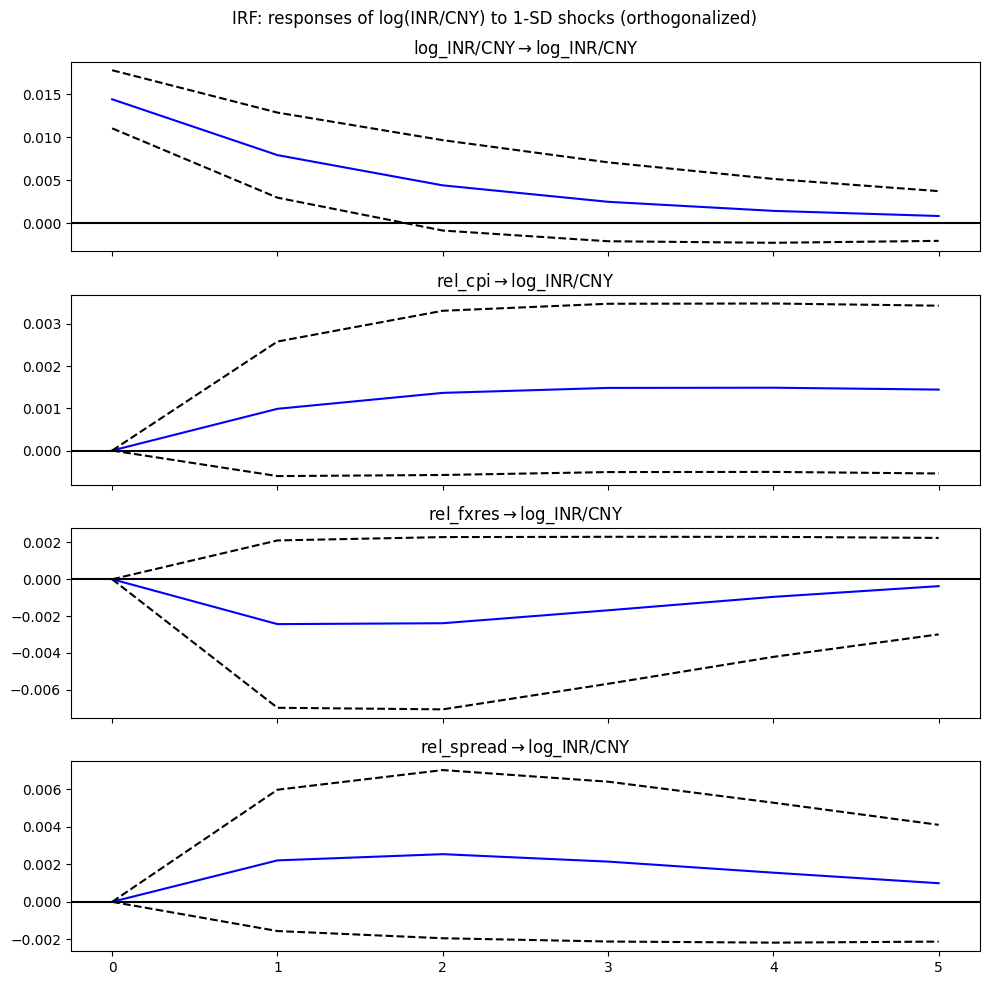

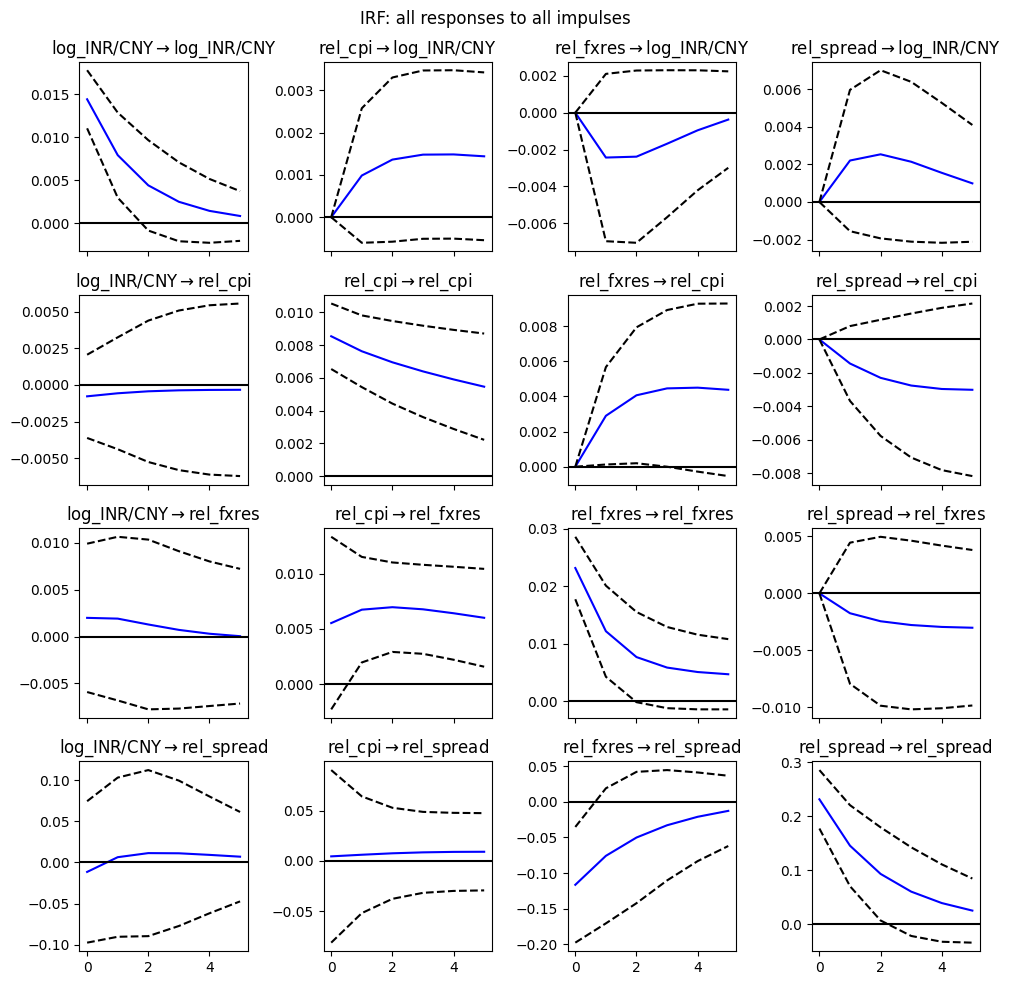

In [ ]:
# assumes var_result = model.fit(lag_order)
# and df_diff (stationary series) is the DataFrame used to fit the VAR

import matplotlib.pyplot as plt

# -------------------------
# Impulse Response Functions
# -------------------------
horizon = 5   # months
irf = var_result.irf(horizon)

# Plot IRF for a single response (log_INR/CNY) to all shocks
fig = irf.plot(orth=True, impulse=None, response='log_INR/CNY', signif=0.05)
plt.suptitle("IRF: responses of log(INR/CNY) to 1-SD shocks (orthogonalized)")
plt.tight_layout()
plt.show()

# Or plot full IRF matrix (all responses to all impulses)
irf.plot(orth=True)
plt.suptitle("IRF: all responses to all impulses")
plt.tight_layout()
plt.show()



In [ ]:
# Get number of forecast steps
steps = 3

# Get the last lag observations from the model
last_obs = var_result.model.endog[-var_result.k_ar:]

# Forecast
forecast = var_result.forecast(y=last_obs, steps=steps)

# Convert to DataFrame
import pandas as pd

forecast_index = pd.date_range(
    start=Y1.index[-1] + pd.offsets.MonthEnd(1),  # change to +1 day if daily data
    periods=steps,
    freq='M'  # 'D' for daily
)

forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=Y1.columns)
print(forecast_df)


            log_INR/CNY   rel_cpi  rel_fxres  rel_spread
2025-08-31     2.496130  0.664161  -1.663843    0.569545
2025-09-30     2.490499  0.662296  -1.662322    0.502091
2025-10-31     2.486267  0.661370  -1.662439    0.453153


In [ ]:
mean, lower, upper = var_result.forecast_interval(last_obs, steps=steps)

forecast_df = pd.DataFrame(mean, index=forecast_index, columns=Y.columns)
lower_df = pd.DataFrame(lower, index=forecast_index, columns=Y.columns)
upper_df = pd.DataFrame(upper, index=forecast_index, columns=Y.columns)


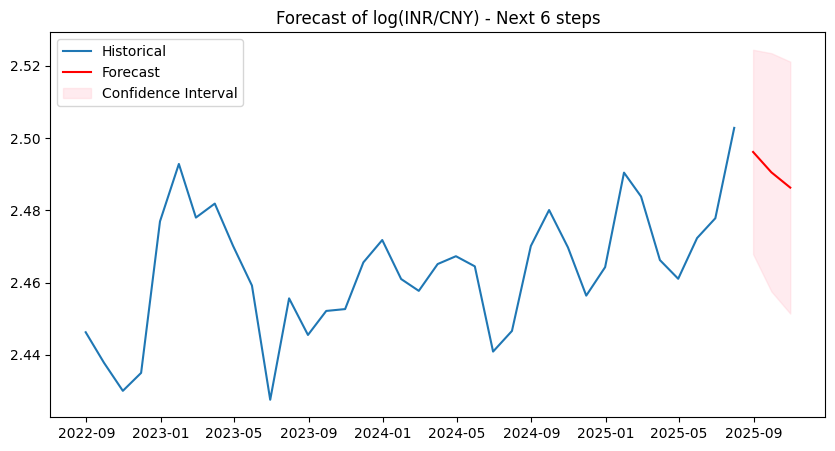

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Y1.index, Y1['log_INR/CNY'], label="Historical")
plt.plot(forecast_df.index, forecast_df['log_INR/CNY'], label="Forecast", color="red")
plt.fill_between(
    forecast_df.index,
    lower_df['log_INR/CNY'],
    upper_df['log_INR/CNY'],
    color="pink", alpha=0.3, label="Confidence Interval"
)
plt.legend()
plt.title("Forecast of log(INR/CNY) - Next 6 steps")
plt.show()



In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df['dxy']=dxy

In [ ]:
df

,USD/INR,USD/CNY,CNY/INR(calculated),INRCNY=X,Brent_Oil,Comex_Copper,dxy
Date,,,,,,,
2025-08-08,7.1810,87.433197,12.175629,0.082131,66.589996,4.4555,98.180000
2025-08-07,7.1828,87.762497,12.218424,0.081843,66.430000,4.3785,98.400002
2025-08-06,7.1834,87.723099,12.211919,0.081887,66.889999,4.3910,98.180000
2025-08-05,7.1780,87.893303,12.244818,0.081667,67.639999,4.3640,98.779999
2025-08-04,7.2116,87.245300,12.097912,0.082659,68.760002,4.4150,98.779999
...,...,...,...,...,...,...,...
2022-08-17,6.7874,79.146004,11.660725,0.085525,93.650002,3.5980,106.570000
2022-08-16,6.7720,79.552902,11.747328,0.085016,92.339996,3.6365,106.500000
2022-08-15,6.7418,79.627602,11.811030,0.084532,95.099998,3.6290,106.550003


In [ ]:
import numpy as np, pandas as pd

# Example start: df_daily already loaded, index = DatetimeIndex (business days)
# create log prices and returns
for col in ['INRCNY=X', 'dxy', 'Brent_Oil', 'Comex_Copper']:
    df[f'log_{col}'] = np.log(df[col])
    df[f'ret_{col}'] = df[f'log_{col}'].diff()



# drop initial NA from diffs
df = df.dropna(subset=[f'ret_{c}' for c in ['INRCNY=X', 'dxy', 'Brent_Oil', 'Comex_Copper']])


In [ ]:
# policy dummy: 1 on release/announcement days, 0 else
# policy_dates should be a list of datetime-like objects (monthly release/decision days)
df_daily['policy_dummy'] = 0
policy_dates = pd.to_datetime(['2020-03-27','2022-05-04','2023-02-08'])  # replace with your dates
df_daily.loc[df_daily.index.isin(policy_dates), 'policy_dummy'] = 1

In [ ]:
# install arch if needed
# !pip install arch


from statsmodels.tsa.stattools import adfuller, kpss

def unit_root_report(series, name):
    s = series.dropna()
    adf = adfuller(s, autolag='AIC')
    kpss_stat, kpss_p, _, _ = kpss(s, nlags='auto')
    print(f"\n{name}")
    print(f" ADF stat {adf[0]:.4f} p={adf[1]:.4f}")
    print(f" KPSS stat {kpss_stat:.4f} p={kpss_p:.4f}")


# Test log-levels and returns
unit_root_report(df['log_INRCNY=X'], 'log_INR_CNY (level)')
unit_root_report(df['ret_INRCNY=X'].dropna(), 'ret_INR_CNY (return)')
unit_root_report(df['log_Brent_Oil'], 'log_Brent (level)')
unit_root_report(df['ret_Brent_Oil'], 'ret_Brent (return)')
unit_root_report(df['log_Comex_Copper'], 'log_Copper (level)')
unit_root_report(df['ret_Comex_Copper'], 'ret_Copper (return)')
unit_root_report(df['log_dxy'], 'log_DXY (level)')
unit_root_report(df['ret_dxy'], 'ret_DXY (return)')



log_INR_CNY (level)
 ADF stat -3.2284 p=0.0184
 KPSS stat 0.5998 p=0.0227

ret_INR_CNY (return)
 ADF stat -12.4356 p=0.0000
 KPSS stat 0.0973 p=0.1000

log_Brent (level)
 ADF stat -2.6147 p=0.0900
 KPSS stat 2.3495 p=0.0100

ret_Brent (return)
 ADF stat -11.2725 p=0.0000
 KPSS stat 0.0224 p=0.1000

log_Copper (level)
 ADF stat -2.7513 p=0.0656
 KPSS stat 2.7122 p=0.0100

ret_Copper (return)
 ADF stat -7.8088 p=0.0000
 KPSS stat 0.0224 p=0.1000

log_DXY (level)
 ADF stat -2.5619 p=0.1011
 KPSS stat 0.7551 p=0.0100

ret_DXY (return)
 ADF stat -13.1163 p=0.0000
 KPSS stat 0.0619 p=0.1000


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Assuming your dataframe is `df` with daily logs
# Columns: log_INR_CNY, log_Brent, log_Copper, log_DXY

johansen_res = coint_johansen(df[['log_INRCNY=X','log_Brent_Oil','log_Comex_Copper','log_dxy']], det_order=0, k_ar_diff=5)

print("Eigenvalues:", johansen_res.eig)
print("Trace Statistic:", johansen_res.lr1)
print("5% Critical Values:", johansen_res.cvt[:,1])


Eigenvalues: [0.0358849  0.01748215 0.01164577 0.00398902]
Trace Statistic: [50.1828002  23.94378408 11.28058174  2.86984759]
5% Critical Values: [47.8545 29.7961 15.4943  3.8415]


Trace test

r = 0: 50.18 > 47.85 → reject null → at least 1 cointegrating relation.

r ≤ 1: 23.94 < 29.79 → fail to reject → so rank = 1.

 So we have one long-run cointegration relationship among log_INR_CNY, log_Brent, log_Copper, log_DXY.
That means INR/CNY and these global factors share a common stochastic trend (they move together in the long run).

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM

vecm = VECM(df[['log_INRCNY=X','log_Brent_Oil','log_Comex_Copper','log_dxy']],
            k_ar_diff=3, coint_rank=1,deterministic="ci")  # 5 daily lags, 1 cointegrating relation
vecm_res = vecm.fit()

print(vecm_res.summary())


Det. terms outside the coint. relation & lagged endog. parameters for equation log_INRCNY=X
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.log_INRCNY=X        -0.3259      0.037     -8.784      0.000      -0.399      -0.253
L1.log_Brent_Oil       -0.0002      0.009     -0.018      0.986      -0.017       0.017
L1.log_Comex_Copper     0.0089      0.010      0.878      0.380      -0.011       0.029
L1.log_dxy             -0.0177      0.037     -0.473      0.636      -0.091       0.056
L2.log_INRCNY=X        -0.1372      0.039     -3.537      0.000      -0.213      -0.061
L2.log_Brent_Oil        0.0120      0.009      1.350      0.177      -0.005       0.029
L2.log_Comex_Copper     0.0095      0.010      0.937      0.349      -0.010       0.029
L2.log_dxy             -0.0066      0.037     -0.178      0.859      -0.079       0.066
L3.log_INRCNY=X        -0.01

In [ ]:
import numpy as np
import pandas as pd

vecm_forecast = vecm_res.predict(steps=11)
forecast_df = pd.DataFrame(vecm_forecast, columns=['log_INRCNY=X','log_Brent_Oil','log_Comex_Copper','log_dxy'])

# Convert INR/CNY back from log to level
forecast_df['INR_CNY'] = np.exp(forecast_df['log_INRCNY=X'])
print(forecast_df[['INR_CNY']])


     INR_CNY
0   0.084837
1   0.084801
2   0.084777
3   0.084757
4   0.084736
5   0.084718
6   0.084701
7   0.084686
8   0.084671
9   0.084658
10  0.084646


In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()

# Load into DataFrame
import io
exx = pd.read_csv(io.BytesIO(uploaded['exfut.csv']), parse_dates=['Date'], index_col='Date')

# Check head
exx.head()


Saving exfut.csv to exfut.csv


,Brent Oil Price (USD),Brent Oil Log Return,Comex Copper Price (USD),Comex Copper Log Return,DXY Value,DXY Log Return
Date,,,,,,
2025-08-09,66.35,0.0,4.4235,0.000000,97.85,0.000000
2025-08-10,66.35,0.0,4.5085,0.019033,97.85,0.000000
2025-08-11,66.35,0.0,4.4820,-0.005895,97.85,0.000000
2025-08-12,66.35,0.0,4.4645,-0.003912,98.17,0.003265
2025-08-13,66.35,0.0,4.4780,0.003019,98.17,0.000000


In [ ]:
exx = exx.rename(columns={'Brent Oil Log Return': 'ret_Brent_Oil',
                         'Comex Copper Log Return': 'ret_Comex_Copper',
                         'DXY Log Return': 'ret_dxy'})


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['log_INRCNY=X'],
                order=(1,1,1),   # ARIMA(1,1,1) on INR/CNY
                exog=df[['ret_Brent_Oil','ret_Comex_Copper','ret_dxy']])
res = model.fit(disp=False)
exog_fut= exx[['ret_Brent_Oil','ret_Comex_Copper','ret_dxy']]
forecast = res.get_forecast(steps=11, exog=exog_fut).predicted_mean


In [ ]:
np.exp(forecast)

,predicted_mean
724,0.084832
725,0.084823
726,0.084827
727,0.084829
728,0.084825
729,0.084832
730,0.084826
731,0.084825
732,0.084826
733,0.084810


In [ ]:
from statsmodels.tsa.api import VAR

# Subset to stationary returns
Y2 = df[['ret_INRCNY=X','ret_Brent_Oil','ret_Comex_Copper','ret_dxy']].dropna()
Y2=Y2.sort_index()
# Fit VAR
var_model = VAR(Y2)
lag_order = var_model.select_order(maxlags=10)  # daily → up to 2 weeks lags
print(lag_order.summary())

results = var_model.fit(lag_order.aic)
print(results.summary())

# Forecast next 10 days
forecast_vals = results.forecast(Y.values[-results.k_ar:], steps=10)

import pandas as pd
forecast_df = pd.DataFrame(forecast_vals,
                           columns=Y2.columns,
                           index=pd.date_range(Y2.index[-1]+pd.Timedelta(days=1),
                                               periods=10, freq='B'))
print(forecast_df)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -37.46     -37.43*   5.412e-17      -37.45
1       -37.53      -37.41   4.998e-17     -37.49*
2      -37.54*      -37.31  4.985e-17*      -37.45
3       -37.53      -37.20   4.999e-17      -37.41
4       -37.51      -37.07   5.134e-17      -37.34
5       -37.49      -36.95   5.216e-17      -37.28
6       -37.48      -36.84   5.285e-17      -37.23
7       -37.45      -36.70   5.459e-17      -37.16
8       -37.43      -36.58   5.558e-17      -37.10
9       -37.40      -36.46   5.695e-17      -37.04
10      -37.38      -36.33   5.813e-17      -36.98
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 27, Aug, 2025
Time:                     03:16:56
------------------------------------------------------------

In [ ]:
np.exp(forecast_df['ret_INRCNY=X'])

,ret_INRCNY=X
2025-08-08,0.361190
2025-08-11,1.040769
2025-08-12,1.106391
2025-08-13,0.964872
2025-08-14,0.999790
2025-08-15,1.005232
2025-08-18,0.998177
2025-08-19,0.999807
2025-08-20,1.000333
2025-08-21,0.999931


In [ ]:

!pip install arch xgboost scikit-learn --quiet


In [ ]:
df2=df.sort_index()

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ========== 1. Utility functions ==========

def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    dir_acc = (np.sign(y_true) == np.sign(y_pred)).mean()
    return {'rmse': rmse, 'mae': mae, 'dir_acc': dir_acc}

def prepare_ml_features(df, lags=5):
    """
    Create lagged features for all series in df.
    Example: ret_INR_CNY_lag1, ret_Brent_lag2, etc.
    """
    feat = {}
    for col in df.columns:
        for lag in range(1, lags+1):
            feat[f"{col}_lag{lag}"] = df[col].shift(lag)
    feat_df = pd.DataFrame(feat, index=df.index)
    return feat_df

# ========== 2. Walk-forward VAR + XGBoost ==========

def walk_forward_var_xgb(df, start_train=300, var_lags=2, ml_lags=5, xgb_params=None):
    """
    Hybrid forecast: VAR baseline + XGBoost residual correction
    df must contain returns: ret_INR_CNY, ret_Brent, ret_Copper, ret_DXY
    """
    if xgb_params is None:
        xgb_params = {'n_estimators':100, 'learning_rate':0.05, 'max_depth':3}

    feat_df = prepare_ml_features(df, lags=ml_lags)
    results = []

    for t in range(start_train, len(df)-1):
        train = df.iloc[:t]
        test_idx = t

        # ---- 1) Fit VAR on training data ----
        model = VAR(train)
        sel = model.select_order(maxlags=var_lags)
        p = sel.aic if sel.aic is not None else var_lags
        p = max(1, int(p))
        res_var = model.fit(p)

        # one-step VAR forecast
        last_obs = res_var.endog[-res_var.k_ar:]
        fc = res_var.forecast(last_obs, steps=1)
        pred_var = fc[0, train.columns.get_loc('ret_INRCNY=X')]

        # ---- 2) Build ML training data on VAR residuals ----
        in_sample_preds = res_var.fittedvalues['ret_INRCNY=X']
        in_sample_actual = train['ret_INRCNY=X'].iloc[res_var.k_ar:]  # align
        residuals = in_sample_actual.values - in_sample_preds.values

        X_all = feat_df.iloc[res_var.k_ar:t].dropna()
        minlen = min(len(X_all), len(residuals))
        X_train_ml = X_all.iloc[-minlen:]
        y_train_ml = residuals[-minlen:]

        # train XGBoost on residuals
        dtrain = xgb.DMatrix(X_train_ml, label=y_train_ml)
        bst = xgb.train(xgb_params, dtrain,
                        num_boost_round=xgb_params.get('n_estimators',100))

        # ---- 3) Predict residual correction for test point ----
        X_test_ml = feat_df.iloc[test_idx:test_idx+1].fillna(method='ffill').fillna(0)
        dtest = xgb.DMatrix(X_test_ml)
        pred_resid = bst.predict(dtest)[0]

        # Final hybrid prediction
        pred_final = pred_var + pred_resid

        results.append({
            'date': df.index[test_idx],
            'pred_var': pred_var,
            'pred_resid': pred_resid,
            'pred_final': pred_final,
            'actual': df['ret_INRCNY=X'].iloc[test_idx]
        })

    out = pd.DataFrame(results).set_index('date')
    return out

# ========== 3. Example run ==========

# Assume df_daily already has the return series:
# ['ret_INR_CNY','ret_Brent','ret_Copper','ret_DXY']
dfg = df2[['ret_INRCNY=X','ret_Brent_Oil','ret_Comex_Copper','ret_dxy']]

out_xgb = walk_forward_var_xgb(dfg,
                               start_train=300,
                               var_lags=2,
                               ml_lags=5)

print("Hybrid metrics (VAR+XGB):", metrics(out_xgb['actual'], out_xgb['pred_final']))
print("VAR-only metrics:", metrics(out_xgb['actual'], out_xgb['pred_var']))

out_xgb.head()


Hybrid metrics (VAR+XGB): {'rmse': np.float64(0.004109283549579824), 'mae': 0.002838830796322709, 'dir_acc': np.float64(0.5508274231678487)}
VAR-only metrics: {'rmse': np.float64(0.0039800653581380276), 'mae': 0.0027885876082195888, 'dir_acc': np.float64(0.5508274231678487)}


,pred_var,pred_resid,pred_final,actual
date,,,,
2023-11-06,-0.000455,0.001602,0.001148,-0.006529
2023-11-07,0.000494,-0.000462,0.000032,0.000940
2023-11-08,-0.000436,-0.000464,-0.000899,-0.001045
2023-11-09,0.000376,-0.000131,0.000245,-0.000754
2023-11-10,-0.000828,0.001641,0.000814,0.006150


In [ ]:
# 1) Fit VAR on full sample
model = VAR(df2)
res_var = model.fit(2)   # choose lag order properly (AIC/BIC)

# VAR forecast baseline
steps = 6
last_obs = res_var.endog[-res_var.k_ar:]
var_forecast = res_var.forecast(last_obs, steps=steps)
var_fc_df = pd.DataFrame(var_forecast,
                         columns=df2.columns,
                         index=pd.date_range(df.index[-1]+pd.Timedelta(days=1),
                                             periods=steps, freq="D"))

# 2) Train XGBoost on in-sample VAR residuals
in_sample_preds = res_var.fittedvalues['ret_INRCNY=X']
in_sample_actual = df2['ret_INRCNY=X'].iloc[res_var.k_ar:]
residuals = in_sample_actual.values - in_sample_preds.values

X_all = prepare_ml_features(df2, lags=5).iloc[res_var.k_ar:].dropna()
y_all = residuals[-len(X_all):]

dtrain = xgb.DMatrix(X_all, label=y_all)
bst = xgb.train({'max_depth':3, 'learning_rate':0.05, 'n_estimators':200},
                dtrain, num_boost_round=200)

# 3) Construct lag features for future horizons (recursive)
future_preds = []
df_ext = pd.concat([df2, var_fc_df])  # combine actuals + VAR forecast

for h in range(steps):
    # create lagged features at horizon h
    X_future = prepare_ml_features(df_ext, lags=5).iloc[len(df2)+h:len(df2)+h+1]
    X_future = X_future.fillna(method="ffill").fillna(0)
    dtest = xgb.DMatrix(X_future)
    resid_correction = bst.predict(dtest)[0]

    hybrid_pred = var_fc_df.iloc[h]['ret_INRCNY=X'] + resid_correction
    future_preds.append(hybrid_pred)

hybrid_fc = pd.Series(future_preds, index=var_fc_df.index, name="ret_INR_CNY=X_hybrid")


In [ ]:
hybrid_fc

,ret_INR_CNY=X_hybrid
2022-08-12,0.000121
2022-08-13,0.000304
2022-08-14,-0.000328
2022-08-15,-0.000021
2022-08-16,-0.000567
2022-08-17,-0.000701


In [ ]:
import statsmodels.api as sm

# Build exog dataframe (lagged to avoid look-ahead)
exog = df[['ret_dxy','ret_Brent_Oil','ret_Comex_Copper']].shift(1).dropna()
y = df['ret_INRCNY=X'].reindex(exog.index)

# choose small AR order for daily: try p=1 or p=2
p = 2
model = sm.tsa.SARIMAX(y, exog=exog, order=(p,0,0), enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary())
# one-step-ahead forecast example for next day (use newest exog row)
one_step = res.get_forecast(steps=1, exog=exog.iloc[[-1]].values)
print("Forecast ret:", one_step.predicted_mean.values[0])
print("CI:", one_step.conf_int(alpha=0.05))


                               SARIMAX Results                                
Dep. Variable:           ret_INRCNY=X   No. Observations:                  723
Model:               SARIMAX(2, 0, 0)   Log Likelihood                2869.659
Date:                Wed, 27 Aug 2025   AIC                          -5727.318
Time:                        01:59:34   BIC                          -5699.834
Sample:                             0   HQIC                         -5716.708
                                - 723                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ret_dxy             -0.0132      0.035     -0.381      0.704      -0.081       0.055
ret_Brent_Oil        0.0019      0.009      0.227      0.820      -0.015       0.019
ret_Comex_Copper     0.0063 

In [ ]:
from statsmodels.tsa.api import VAR

df_returns = df[['ret_INR_CNY','ret_DXY','ret_Brent','ret_Copper']].dropna()
model_var = VAR(df_returns)
res_var = model_var.fit(maxlags=2)   # small lag daily
print(res_var.summary())
# Forecast next 5 days
last_obs = res_var.endog[-res_var.k_ar:]
fc = res_var.forecast(last_obs, steps=5)
fc_df = pd.DataFrame(fc, columns=df_returns.columns)
print(fc_df)


In [ ]:
# After ARIMAX 'res' from above
resid = res.resid.dropna()

from arch import arch_model
# Fit GARCH(1,1) on residuals (Zero mean since residuals)
garch = arch_model(resid, vol='Garch', p=1, q=1, mean='Zero', dist='normal')
gres = garch.fit(disp='off')
print(gres.summary())

# Get conditional volatility (sigma)
df_daily.loc[resid.index, 'cond_vol'] = gres.conditional_volatility


In [ ]:
# prepare features and sequences
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

features = df_daily[['ret_INR_CNY','ret_DXY','ret_Brent','ret_Copper','cond_vol','policy_dummy']].dropna()
# create lag features for model input: use last 20 days to predict next day
SEQ_LEN = 20
X, y = [], []
feat_vals = features.values
for i in range(SEQ_LEN, len(feat_vals)):
    X.append(feat_vals[i-SEQ_LEN:i, 1:])  # exclude target column from features if needed
    y.append(feat_vals[i, 0])            # target = ret_INR_CNY at time i
X = np.array(X); y = np.array(y)

# split train/test (time-series)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# scale by feature (fit on train)
nsamples, seq_len, nfeat = X_train.shape
X_train_2d = X_train.reshape(-1, nfeat)
X_test_2d = X_test.reshape(-1, nfeat)

scaler = StandardScaler().fit(X_train_2d)
X_train = scaler.transform(X_train_2d).reshape(nsamples, seq_len, nfeat)
X_test = scaler.transform(X_test_2d).reshape(X_test.shape[0], seq_len, nfeat)

# Build LSTM (small)
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, nfeat)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[es])

# predict
preds = model.predict(X_test)


In [ ]:
# monthly_surprise is a series indexed by month-end or release date
# create daily series with forward-fill (or set on release day)
df_daily['cpi_surprise'] = monthly_surprise.reindex(df_daily.index, method='ffill').fillna(0)
# or set only on release day:
df_daily['cpi_surprise_release'] = 0
for d, val in monthly_surprise.items():
    # find the next trading day in df_daily.index >= d
    next_td = df_daily.index[df_daily.index >= d][0]
    df_daily.loc[next_td, 'cpi_surprise_release'] = val
